# Feature Engineering

In [1]:
!conda install -c anaconda pandas --yes
!conda install -c anaconda seaborn --yes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from scipy.stats import norm,skew,uniform
from scipy import stats
import datetime as dt
%matplotlib inline

!conda update -n base -c defaults conda --yes


from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
!conda install -c "conda-forge/label/gcc7" wordcloud --yes
from wordcloud import WordCloud

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

Solving environment: done

## Package Plan ##

  environment location: /Users/asamitakeuchi/anaconda3

  added / updated specs:
    - pandas


The following packages will be UPDATED:

  ca-certificates    conda-forge/label/gcc7::ca-certificat~ --> anaconda::ca-certificates-2022.4.26-hecd8cb5_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main::certifi-2023.7.22-py310hec~ --> anaconda::certifi-2022.6.15-py310hecd8cb5_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /Users/asamitakeuchi/anaconda3

  added / updated specs:
    - conda


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2022.4.26-h~ --> pkgs/main::ca-certificates-2023.05.30-hecd8cb5_0 
  certifi            anaconda::certifi-2022.6.15-py310hecd~ --> 

In [2]:
!python3 --version
!pip3 --version

Python 3.11.3
pip 23.2.1 from /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip (python 3.11)


In [3]:
train = pd.read_csv('/Users/asamitakeuchi/mercari/train2.csv')

In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat_1,cat_2,cat_3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NoBrand,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NoBrand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NoBrand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         1482535 non-null  object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
 8   cat_1              1476208 non-null  object 
 9   cat_2              1476208 non-null  object 
 10  cat_3              1476208 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 124.4+ MB


In [6]:
#check null data
def check_if_null(df):
    null = df.isnull().sum()
    null_percent = (df.isnull().sum()/df.count()*100).round(2)
    null_values = pd.concat([null, null_percent], axis = 1)
    null_values.columns = ['Null Values', '%Null']
    return null_values

check_if_null(train)

,Null Values,%Null
train_id,0,0.00
name,0,0.00
item_condition_id,0,0.00
category_name,6327,0.43
brand_name,0,0.00
price,0,0.00
shipping,0,0.00
item_description,4,0.00
cat_1,6327,0.43
cat_2,6327,0.43


In [7]:
#category_name, cat_1, cat_2, and cat_3 have 6327 mising values. replace them with missing
train['category_name'].fillna('missing')
train['cat_1'].fillna('missing')
train['cat_2'].fillna('missing')
train['cat_3'].fillna('missing')

0                     T-shirts
1           Components & Parts
2                       Blouse
3           Home Décor Accents
4                    Necklaces
                  ...         
1482530               Mid-Calf
1482531                Dresses
1482532    Fitness accessories
1482533     Home Décor Accents
1482534                Wallets
Name: cat_3, Length: 1482535, dtype: object

In [8]:
#create other features
train['name_word_count']=train['name'].apply(lambda x: len(x.split()) if type(x) != float else x)
train['name_word_len']=train['name'].apply(lambda x: len(x) if type(x) != float else x)
train['desc_word_count']= train['item_description'].apply(lambda x: len(x.split()) if type(x) != float else x)
train['desc_word_len']=train['item_description'].apply(lambda x: len(x) if type(x) != float else x)

Text(0.5, 1.0, 'Description Word Length Histogram')

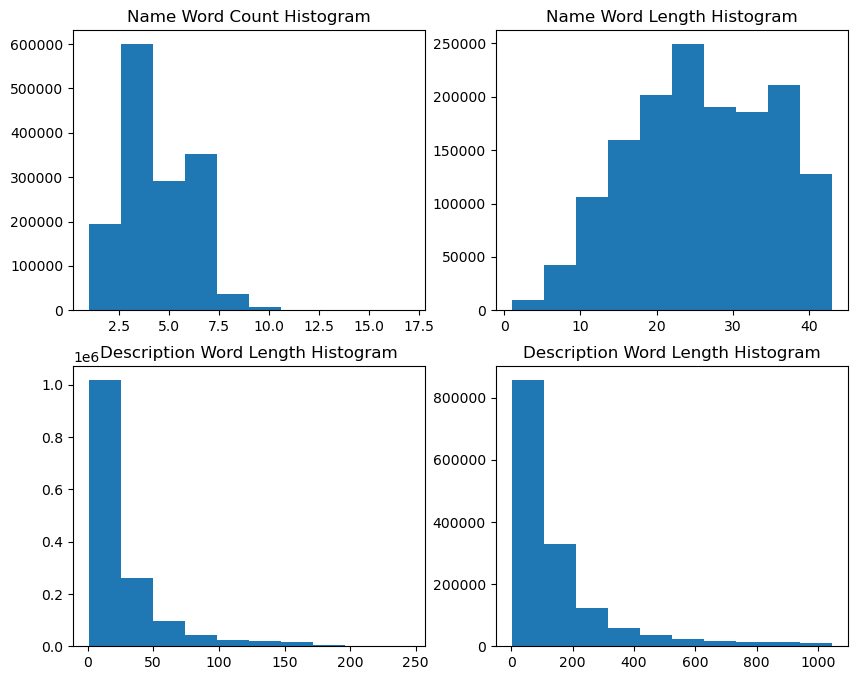

In [9]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

_ = ax1.hist(train['name_word_count'])
_ = ax2.hist(train['name_word_len'])
_ = ax3.hist(train['desc_word_count'])
_ = ax4.hist(train['desc_word_len'])

ax1.set_title('Name Word Count Histogram')
ax2.set_title('Name Word Length Histogram')
ax3.set_title('Description Word Length Histogram')
ax4.set_title('Description Word Length Histogram')

In [10]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat_1,cat_2,cat_3,name_word_count,name_word_len,desc_word_count,desc_word_len
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NoBrand,10.0,1,No description yet,Men,Tops,T-shirts,7,35,3.0,18.0
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,4,32,36.0,188.0
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,2,14,29.0,124.0
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NoBrand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,3,21,32.0,173.0
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NoBrand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,4,20,5.0,41.0


In [11]:
#one-hot encoding for cat_1
train_cat_1_encoded = pd.get_dummies(train, columns = ['cat_1'])
train_cat_1_encoded.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat_2,cat_3,...,cat_1_Beauty,cat_1_Electronics,cat_1_Handmade,cat_1_Home,cat_1_Kids,cat_1_Men,cat_1_Other,cat_1_Sports & Outdoors,cat_1_Vintage & Collectibles,cat_1_Women
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NoBrand,10.0,1,No description yet,Tops,T-shirts,...,0,0,0,0,0,1,0,0,0,0
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Computers & Tablets,Components & Parts,...,0,1,0,0,0,0,0,0,0,0
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Tops & Blouses,Blouse,...,0,0,0,0,0,0,0,0,0,1
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NoBrand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home Décor,Home Décor Accents,...,0,0,0,1,0,0,0,0,0,0
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NoBrand,44.0,0,Complete with certificate of authenticity,Jewelry,Necklaces,...,0,0,0,0,0,0,0,0,0,1


In [12]:
#merge cat_2 and cat_3 for encoding
train_cat_1_encoded['cat_2_3'] = train_cat_1_encoded['cat_2'].astype(str)+'/'+train_cat_1_encoded['cat_3'].astype(str)
train_prep = train_cat_1_encoded.drop(columns=['category_name','cat_2','cat_3'], axis=1).dropna()
train_prep.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,name_word_count,name_word_len,desc_word_count,...,cat_1_Electronics,cat_1_Handmade,cat_1_Home,cat_1_Kids,cat_1_Men,cat_1_Other,cat_1_Sports & Outdoors,cat_1_Vintage & Collectibles,cat_1_Women,cat_2_3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NoBrand,10.0,1,No description yet,7,35,3.0,...,0,0,0,0,1,0,0,0,0,Tops/T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,4,32,36.0,...,1,0,0,0,0,0,0,0,0,Computers & Tablets/Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2,14,29.0,...,0,0,0,0,0,0,0,0,1,Tops & Blouses/Blouse
3,3,Leather Horse Statues,1,NoBrand,35.0,1,New with tags. Leather horses. Retail for [rm]...,3,21,32.0,...,0,0,1,0,0,0,0,0,0,Home Décor/Home Décor Accents
4,4,24K GOLD plated rose,1,NoBrand,44.0,0,Complete with certificate of authenticity,4,20,5.0,...,0,0,0,0,0,0,0,0,1,Jewelry/Necklaces


In [13]:
print("Size of train_prep is:", train_prep.size)
train_prep.isnull().sum()

Size of train_prep is: 32615682


train_id                        0
name                            0
item_condition_id               0
brand_name                      0
price                           0
shipping                        0
item_description                0
name_word_count                 0
name_word_len                   0
desc_word_count                 0
desc_word_len                   0
cat_1_Beauty                    0
cat_1_Electronics               0
cat_1_Handmade                  0
cat_1_Home                      0
cat_1_Kids                      0
cat_1_Men                       0
cat_1_Other                     0
cat_1_Sports & Outdoors         0
cat_1_Vintage & Collectibles    0
cat_1_Women                     0
cat_2_3                         0
dtype: int64

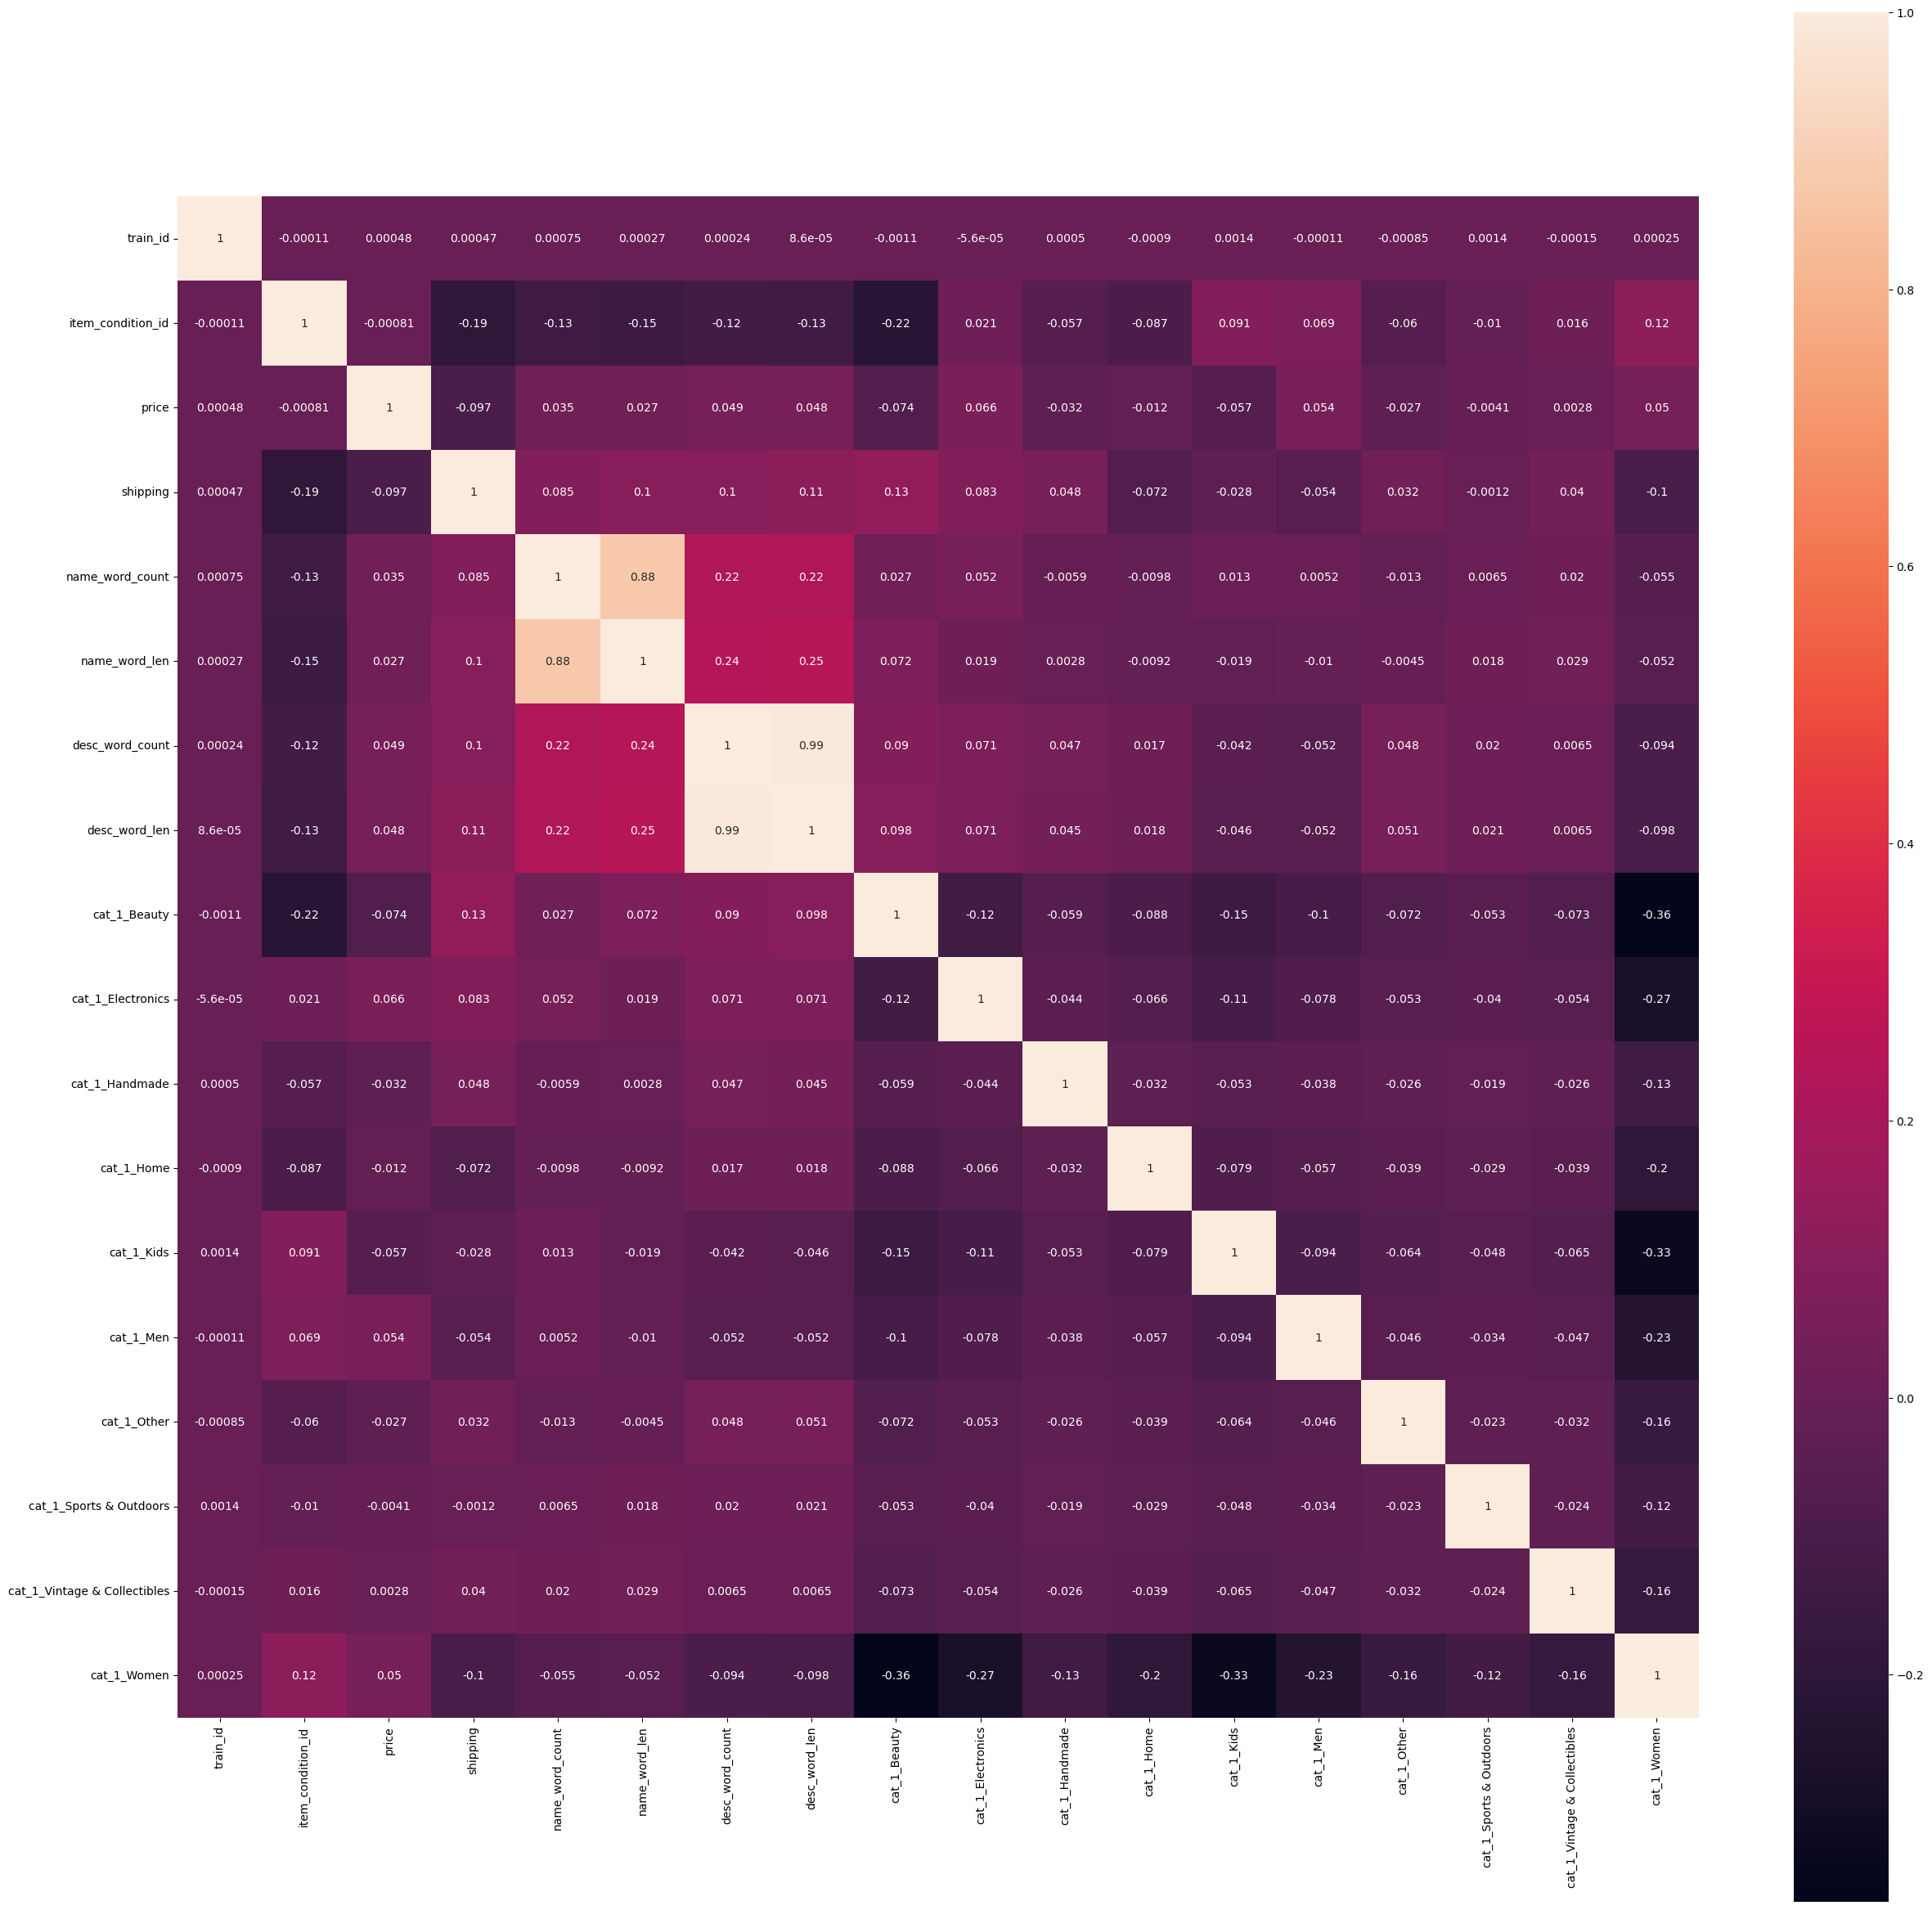

In [14]:
#Correlation matrix
corr = train_prep.corr()
fig, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(corr, annot = True, square = True);

## Encoding by column transformer
I am going to use ColumnTransformer to apply LabelBinarizer, CountVectorizer, TfidfVectorizer, and Normaliaer to encode categorical and numerical variables.

In [15]:
#drop target variable and create y
X = train_prep.drop('price', axis=1)  # Input features
y = train_prep['price']  # Target variable

X.isnull().sum()

train_id                        0
name                            0
item_condition_id               0
brand_name                      0
shipping                        0
item_description                0
name_word_count                 0
name_word_len                   0
desc_word_count                 0
desc_word_len                   0
cat_1_Beauty                    0
cat_1_Electronics               0
cat_1_Handmade                  0
cat_1_Home                      0
cat_1_Kids                      0
cat_1_Men                       0
cat_1_Other                     0
cat_1_Sports & Outdoors         0
cat_1_Vintage & Collectibles    0
cat_1_Women                     0
cat_2_3                         0
dtype: int64

In [16]:
y.isnull().sum()

0

In [17]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1186024, 21)
(296507, 21)
(1186024,)
(296507,)


In [18]:
num_vals = ['name_word_count', 'desc_word_count', 'desc_word_len']
#text_vals = ['name','brand_name','cat_2_3']
#text_desc = ['item_description']

scaler = StandardScaler()

cv = CountVectorizer(
    ngram_range=(1, 2), 
    max_features=100000, 
    token_pattern = r'(?u)\w+|[^\w\s]',
)

tv = TfidfVectorizer(max_features=50000,
                     ngram_range=(1, 2),
                     stop_words='english')

col_transformer = ColumnTransformer(
    transformers=[
      ('num_vals',scaler, num_vals),
      ('name_vals', cv, 'name'),
      ('brand_name_vals', cv, 'brand_name'),
      ('cat_2_3_vals', cv, 'cat_2_3'),
      ('text_desc', tv, 'item_description')])

vectorizer = col_transformer.fit(X_train)
train_vec = vectorizer.transform(X_train).astype(np.float32)
test_vec = vectorizer.transform(X_test).astype(np.float32)

print(train_vec.shape)
print(test_vec.shape)
print(y_train.shape)
print(y_test.shape)


(1186024, 160554)
(296507, 160554)
(1186024,)
(296507,)


In [19]:
print(X.shape)  
print(len(y)) 

(1482531, 21)
1482531


In [22]:
#fit the data
ridge_reg = Ridge(solver = "lsqr", fit_intercept=False)
ridge_reg.fit(train_vec, y_train)
#train and test scorefor ridge regression
train_score_ridge = ridge_reg.score(train_vec, y_train)
test_score_ridge = ridge_reg.score(test_vec, y_test)
cv_scores = cross_val_score(
    ridge_reg, train_vec, y_train, cv=5,
    scoring='neg_root_mean_squared_error'  # Use negative RMSE as the scoring metric
)
cv_rmse_scores = -cv_scores

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())


Ridge Model............................................

The train score for ridge model is 0.6010093908409646
The test score for ridge model is 0.5038001353545588
Cross-Validation RMSE Scores: [27.07278603 27.52234886 28.55617423 26.81095072 28.67233519]
Mean Cross-Validation RMSE: 27.726919005968607


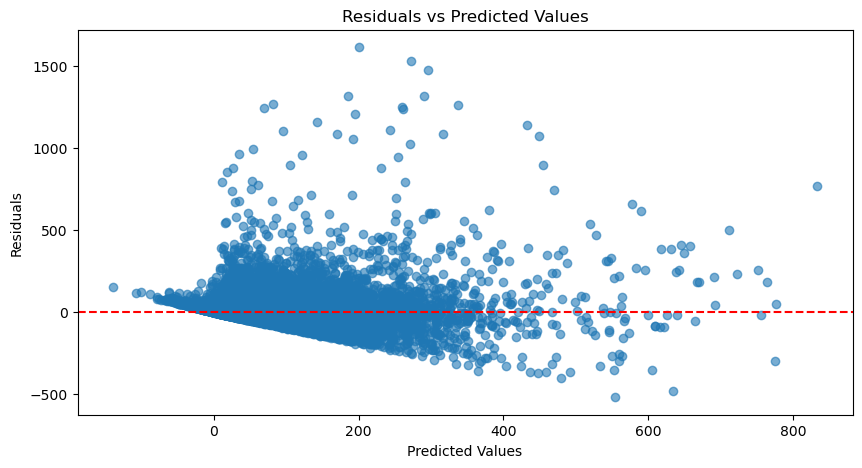

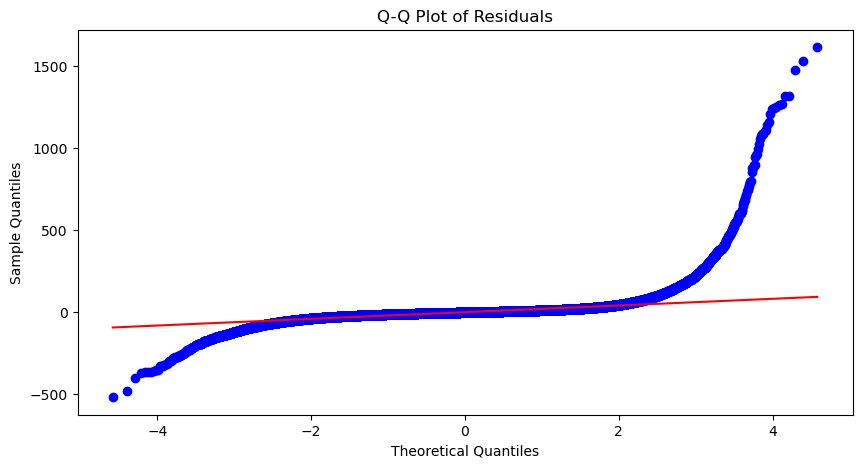

In [24]:
# Predict on the test set
y_pred = ridge_reg.predict(test_vec)

# Calculate residuals
residuals = y_test - y_pred

# Plot Residuals vs Predicted Values
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Plot Q-Q Plot
plt.figure(figsize=(10, 5))
stats.probplot(residuals, plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [23]:
preds = ridge_reg.predict(test_vec)
print(preds)

[69.2395   23.021814  8.661327 ...  3.599052 12.317996 43.467686]


In [ ]:
#y_pred = model.predict(X_test, num_iteration=gbm.best_iteration)